## **AI/ML 400 Final Project: Propofol Dosage Predictor**

### **Table of Contents**
1. About the Dataset
2. Data Analytics and Visualization
3. Model Selection
4. Conclusion

### **About the VitalDB Dataset:** 

| Topic | Value |
| -- | -- |
| Dataset Characteristics | Multivariate |
| Subject Area | Health and Medicine |
| Associated Tasks | Prediction/Classification |
| Feature Type | Real |
| Surgical Cases | 6,388 |
| Features | 79 |

This is a comprehensive dataset of 6,388 surgical patients composed of intraoperative biosignals and clinical information.
The dataset is provided free of charge to help researchers who want to study and develop new medical AI algorithms using monitoring signals from surgical patients. We expect that the distribution of this world's largest biosignal dataset will greatly contribute to the advancement of medical AI research.

The data was obtained from non-cardiac (general, thoracic, urologic, and gynaecologic) surgery patients who underwent routine or emergency surgery in 10 out of 31 operating rooms of Seoul National University Hospital, Seoul, Republic of Korea.
The acquisition and release of the data was approved by the Institutional Review Board of Seoul National University Hospital (H-1408-101-605). The study was also registered at clinicaltrials.gov (NCT02914444).

> Lee HC, Park Y, Yoon SB, Yang SM, Park D, Jung CW. VitalDB, a high-fidelity multi-parameter vital signs database in surgical patients. Sci Data. 2022 Jun 8;9(1):279. doi: 10.1038/s41597-022-01411-5. PMID: 35676300; PMCID: PMC9178032.

> Dataset can be accessed at: https://vitaldb.net/dataset/






### **Data Analytics and Visualization**


#### Raw Data Frame Info 

**Base Dataset:** 79 pre-operative features from case files and Electronic Medical Records. 
> Current Challenges: 
> - A portion of the features still require numeric encoding and normalization.
> - The dataset contains many features that are not clinically relevant or predictive, requiring further feature selection.

In [2]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\6kData\ClinInfo.csv")

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389 entries, 0 to 6388
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseid               6389 non-null   object 
 1   casestart            6389 non-null   int64  
 2   caseend              6389 non-null   int64  
 3   anestart             6389 non-null   int64  
 4   aneend               6389 non-null   float64
 5   opstart              6389 non-null   int64  
 6   opend                6389 non-null   float64
 7   adm                  6389 non-null   int64  
 8   dis                  6389 non-null   int64  
 9   devices              6389 non-null   int64  
 10  tracks               6389 non-null   float64
 11  casedur              6389 non-null   float64
 12  filesize             6389 non-null   object 
 13  age                  6389 non-null   object 
 14  sex                  6389 non-null   object 
 15  height               6389 non-null   o

In [3]:
df.describe()

,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,devices,tracks,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
count,6389.000000,6389.000000,6.389000e+03,6.389000e+03,6.389000e+03,6.389000e+03,6.389000e+03,6.389000e+03,6389.000000,6389.000000,...,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000
mean,0.010800,11346.608233,-5.785123e+05,-7.500292e+06,-6.934870e+06,-5.671399e+05,-8.541918e+05,5.049962e+04,4.804195,76.904760,...,32.118835,39.773603,0.036950,17.030687,72.826836,0.016909,7.750900,32.604822,7.895882,120.800845
std,0.863242,6659.454273,4.618308e+07,1.663659e+08,1.599095e+08,4.618322e+07,4.610545e+07,4.612700e+07,0.820263,12.459243,...,137.522306,54.538560,0.364034,38.018082,36.143666,0.444575,13.218245,160.512333,469.449765,535.153260
min,0.000000,40.000000,-3.691470e+09,-3.700124e+09,-3.700124e+09,-3.691470e+09,-3.685366e+09,-3.685366e+09,2.000000,0.510000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6180.000000,-1.080000e+03,6.000000e+03,-1.800000e+02,5.520000e+03,-2.250600e+05,2.086800e+05,4.000000,73.000000,...,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,9900.000000,-5.400000e+02,9.780000e+03,1.500000e+03,9.180000e+03,-2.010600e+05,3.931800e+05,5.000000,78.000000,...,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,0.000000,15060.000000,-2.400000e+02,1.494000e+04,2.460000e+03,1.428000e+04,-1.293000e+05,6.495600e+05,5.000000,83.000000,...,0.000000,100.000000,0.000000,0.000000,90.000000,0.000000,10.000000,0.000000,0.000000,0.000000
max,69.000000,62520.000000,7.980000e+03,6.444000e+04,1.350000e+04,1.101600e+05,2.400000e+01,1.930788e+07,16.000000,129.000000,...,1900.000000,200.000000,8.000000,200.000000,330.000000,20.000000,300.000000,4100.000000,37220.000000,15900.000000


#### Pre-op Clinical Info Displayed: normalized and cleaned with relevant features extracted
Data was normalized and cleaned using libraries: pandas and numpy. 
> 
**Data Preparation Steps:** 
- Removed all irrelevant features
- Removed N/A and missing/blank values.
- Normalized text values like Y/N and M/F into binary.
- strictly removed rows with any entries that were non-numeric including symbols.  

---

| Cleaned Dataset Updated Card Info |  | 
|--|--|
| Surgical Cases | 5,589 |
| Features | 32 |



In [26]:
clininfo = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")
clininfo.info()
clininfo.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5590 entries, 0 to 5589
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   caseid         5590 non-null   int64  
 1   casedur        5590 non-null   int64  
 2   age            5590 non-null   float64
 3   sex            5590 non-null   int64  
 4   height         5590 non-null   float64
 5   weight         5590 non-null   float64
 6   bmi            5590 non-null   float64
 7   asa            5590 non-null   int64  
 8   opdur          5590 non-null   int64  
 9   anedur         5590 non-null   int64  
 10  preop_htn      5590 non-null   int64  
 11  preop_dm       5590 non-null   int64  
 12  preop_hb       5590 non-null   float64
 13  preop_plt      5590 non-null   int64  
 14  preop_pt       5590 non-null   int64  
 15  preop_aptt     5590 non-null   float64
 16  preop_na       5590 non-null   int64  
 17  preop_k        5590 non-null   float64
 18  preop_gl

,caseid,casedur,age,sex,height,weight,bmi,asa,opdur,anedur,...,preop_cr,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
count,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,...,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000
mean,3182.635420,187.764937,57.396064,0.502504,162.140458,61.520095,23.301610,1.852594,135.324866,176.429875,...,1.090315,39.402326,0.037478,17.420394,71.848837,0.017531,7.688730,31.028086,7.864222,114.004472
std,1846.583668,111.735961,14.966946,0.500038,10.046210,11.954815,3.619278,0.657007,101.821721,111.544791,...,1.625364,54.345390,0.360885,38.298374,36.167800,0.456025,12.120853,149.273643,498.276810,509.230188
min,1.000000,0.000000,0.300000,0.000000,42.000000,4.800000,11.500000,1.000000,2.000000,15.000000,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1591.250000,102.000000,48.000000,0.000000,156.100000,53.350000,21.000000,1.000000,60.000000,90.000000,...,0.660000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3179.500000,162.000000,59.000000,1.000000,162.100000,60.700000,23.100000,2.000000,110.000000,150.000000,...,0.780000,0.000000,0.000000,0.000000,70.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,4788.750000,249.750000,68.000000,1.000000,168.700000,68.800000,25.400000,2.000000,189.000000,236.500000,...,0.950000,100.000000,0.000000,0.000000,90.000000,0.000000,10.000000,0.000000,0.000000,0.000000
max,6387.000000,1042.000000,94.000000,1.000000,188.600000,139.700000,43.200000,6.000000,955.000000,1020.000000,...,25.620000,200.000000,6.000000,200.000000,330.000000,20.000000,300.000000,2950.000000,37220.000000,15900.000000


#### Histograms
 This visualization shows the distribution of patient counts for each feature, helping identify skewed variables, outliers, and potential issues with data balance.

Index([], dtype='object')


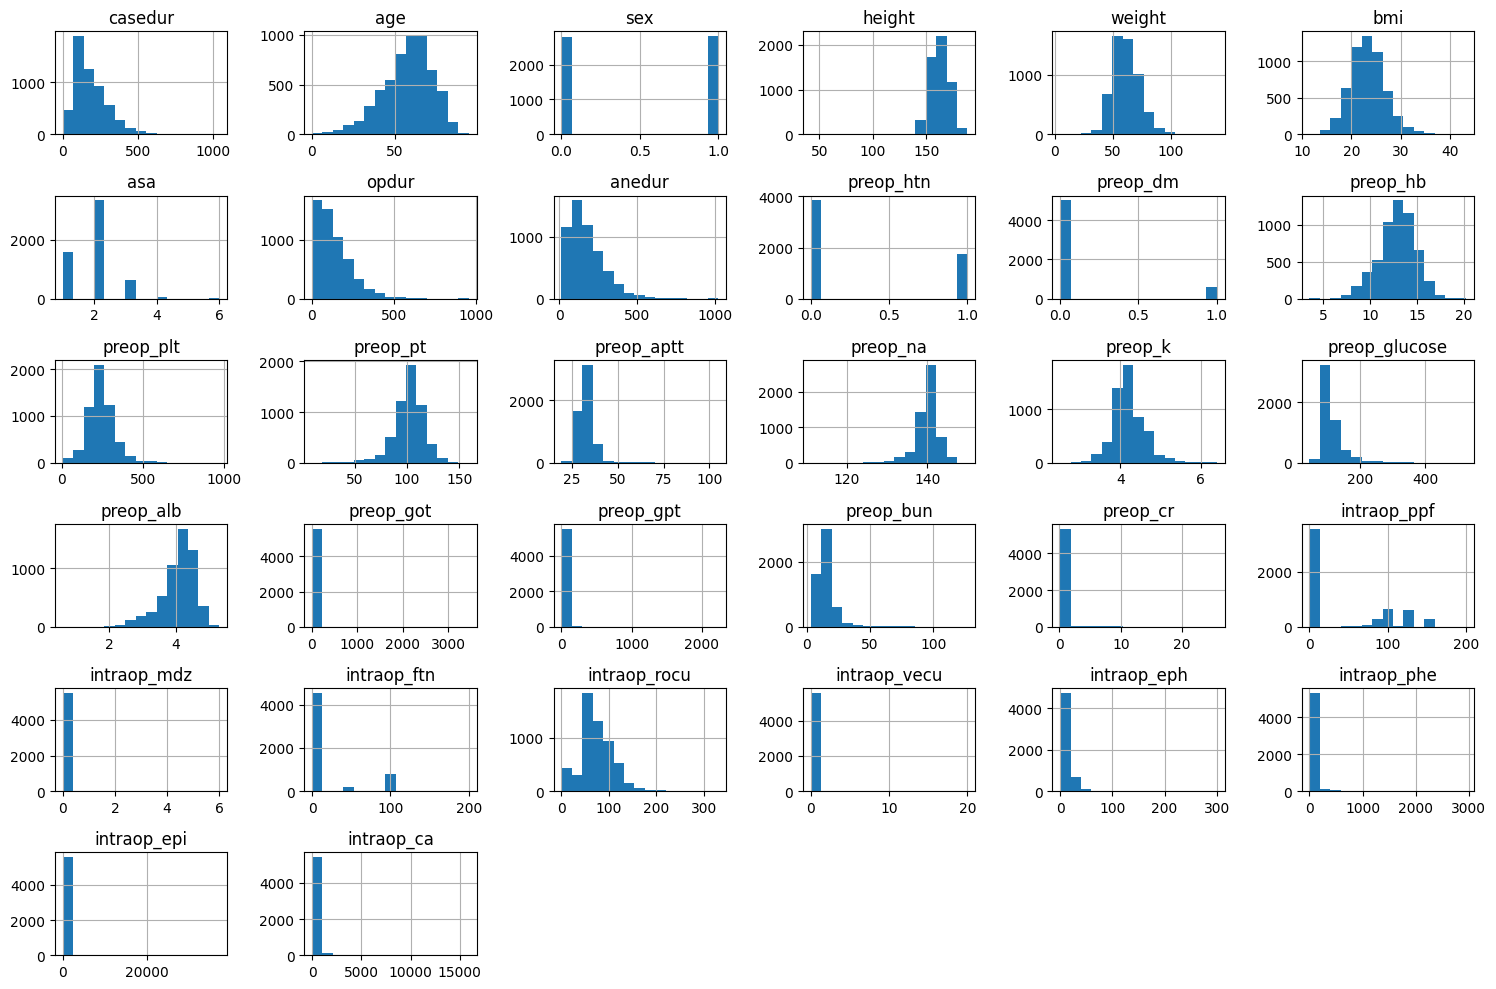

In [49]:
import pandas as pd 
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")


df.dtypes
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

df.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

#### Scatter Plots
In these scatterplots, each numeric feature is plotted against the target variable intraop_ppf. Each subplot shows how one feature changes in relation to the propofol infusion rate. This helps reveal patterns, possible correlations, and any unusual data points, making it easier to see which features might be useful for predicting the target.

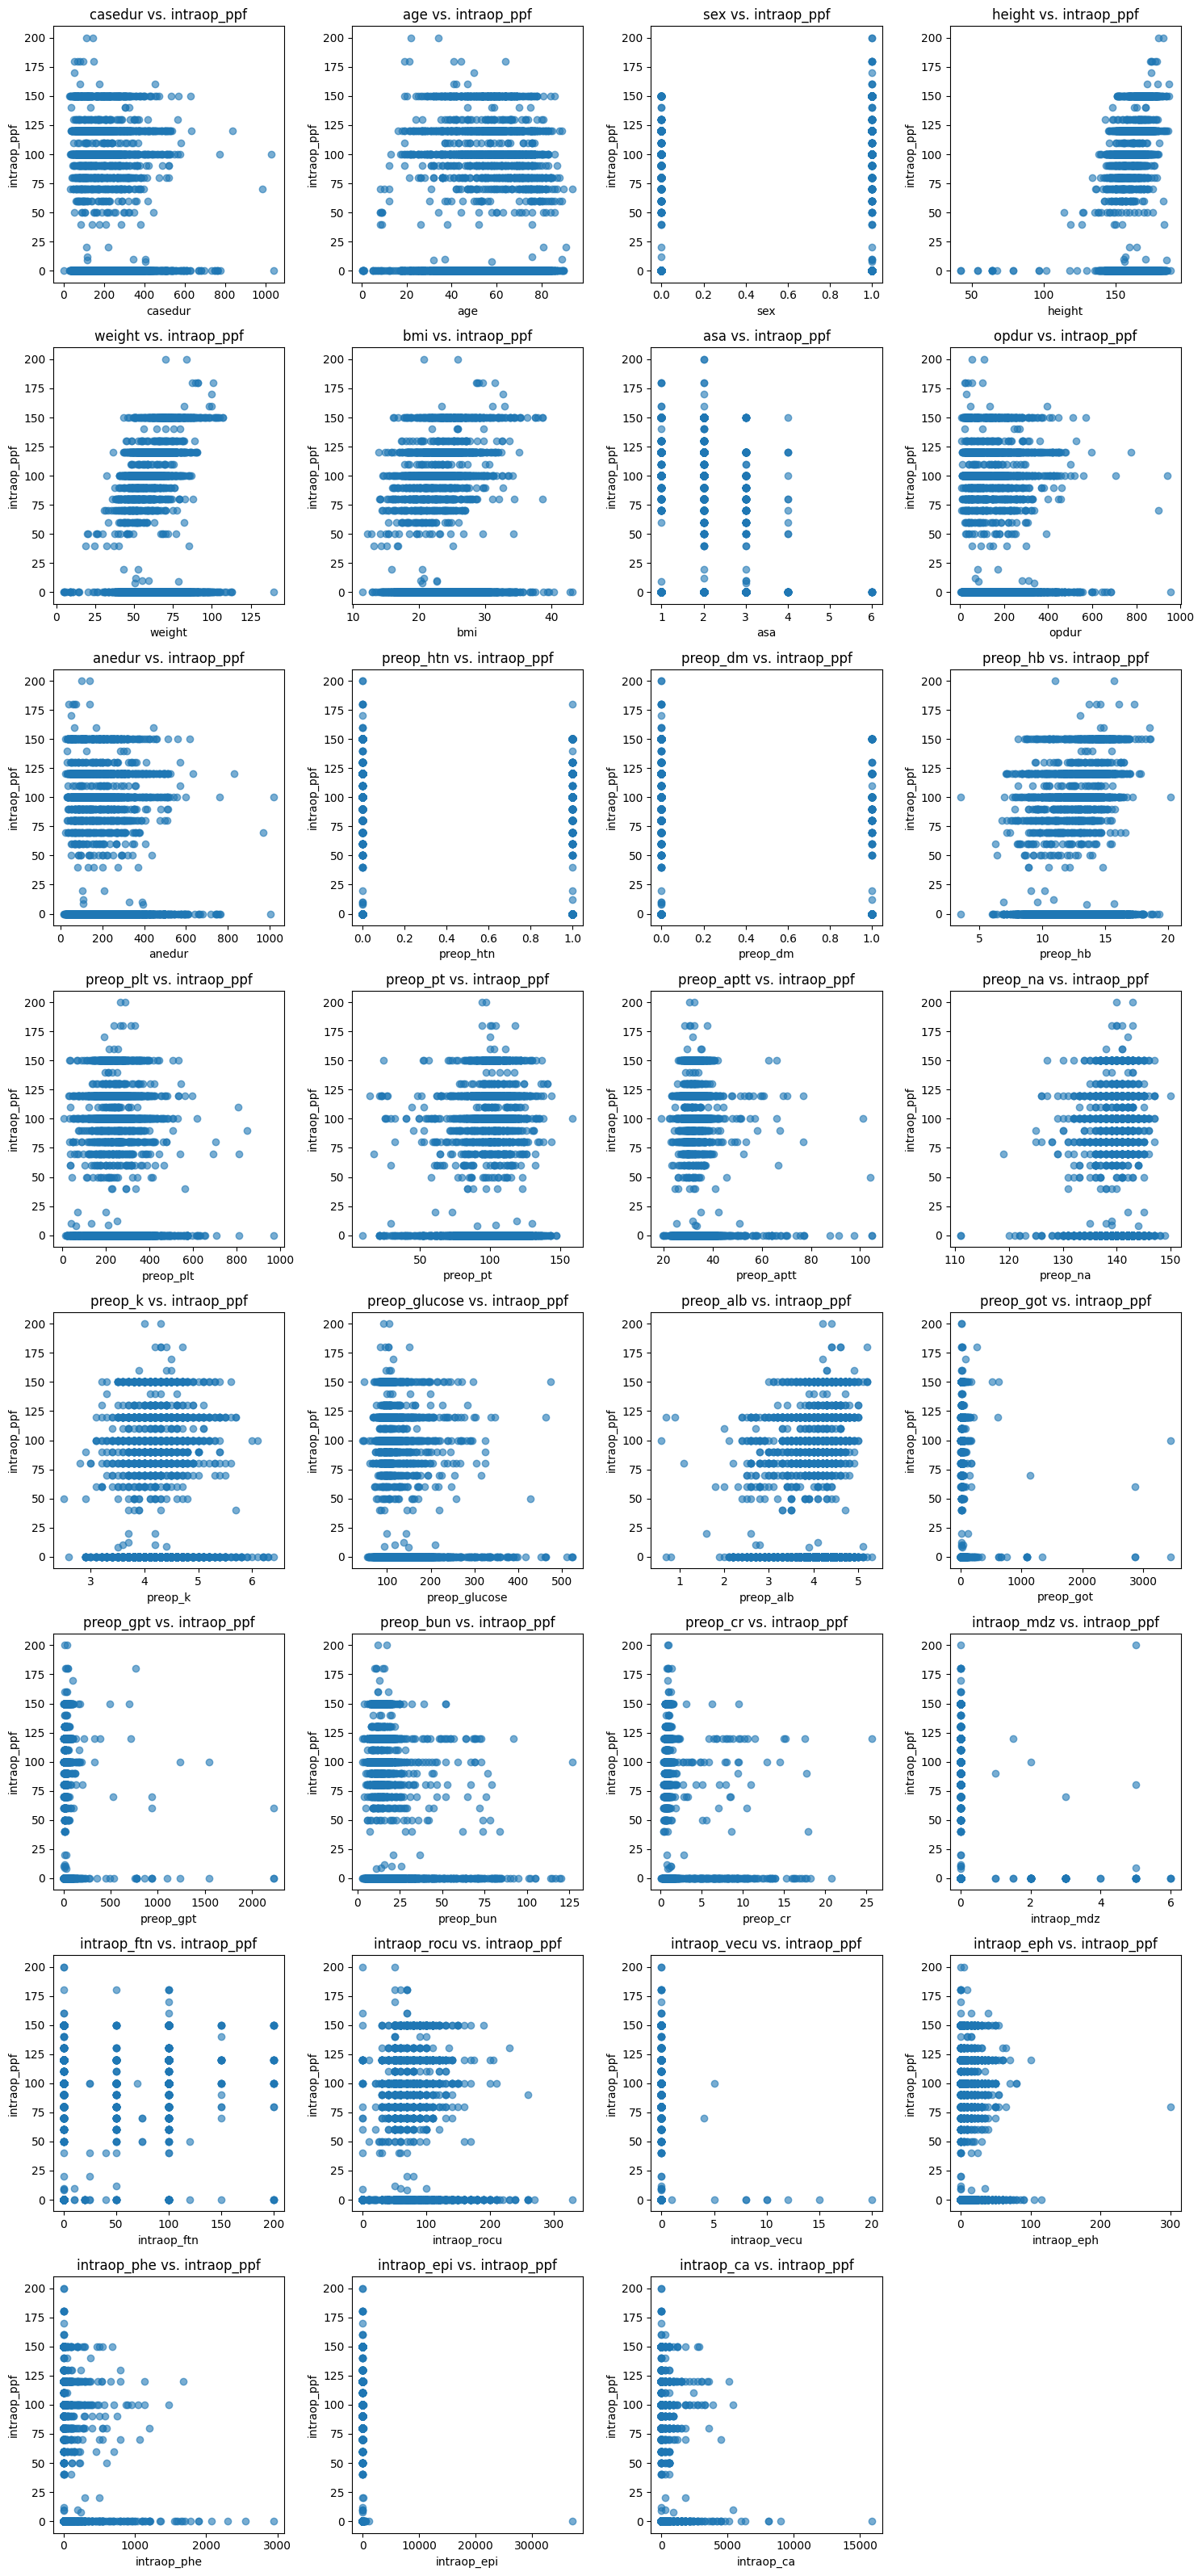

In [54]:
import math
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['number']).columns
feature_cols = [col for col in numeric_cols if col != 'intraop_ppf']

# Determine grid size
n_features = len(feature_cols)
n_cols = 4  # number of plots per row
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # flatten in case of multiple rows

# Plot each feature vs target
for i, col in enumerate(feature_cols):
    axes[i].scatter(df[col], df['intraop_ppf'], alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('intraop_ppf')
    axes[i].set_title(f'{col} vs. intraop_ppf')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### **Correlation Matrix Heatmap, Feature Importance, and Feature Selection**
The heatmap shows the correlation matrix between all features and the target variable intraop_ppf. Across the preoperative dataset, most features display weak or no correlation with the intraoperative propofol bolus dose. The only feature showing a noticeable relationship is intraop_ftn (intraoperative fentanyl dose), which appears as a slight positive correlation in the heatmap.

This pattern remains consistent throughout the analysis: the strongest association is consistently between fentanyl dose and propofol bolus dose. This relationship also appears in the feature importance ranking and is reinforced by the results of L1-based feature selection, which identifies intraop_ftn as one of the most relevant predictors for the model.

##### Correlation Matrix Heatmap

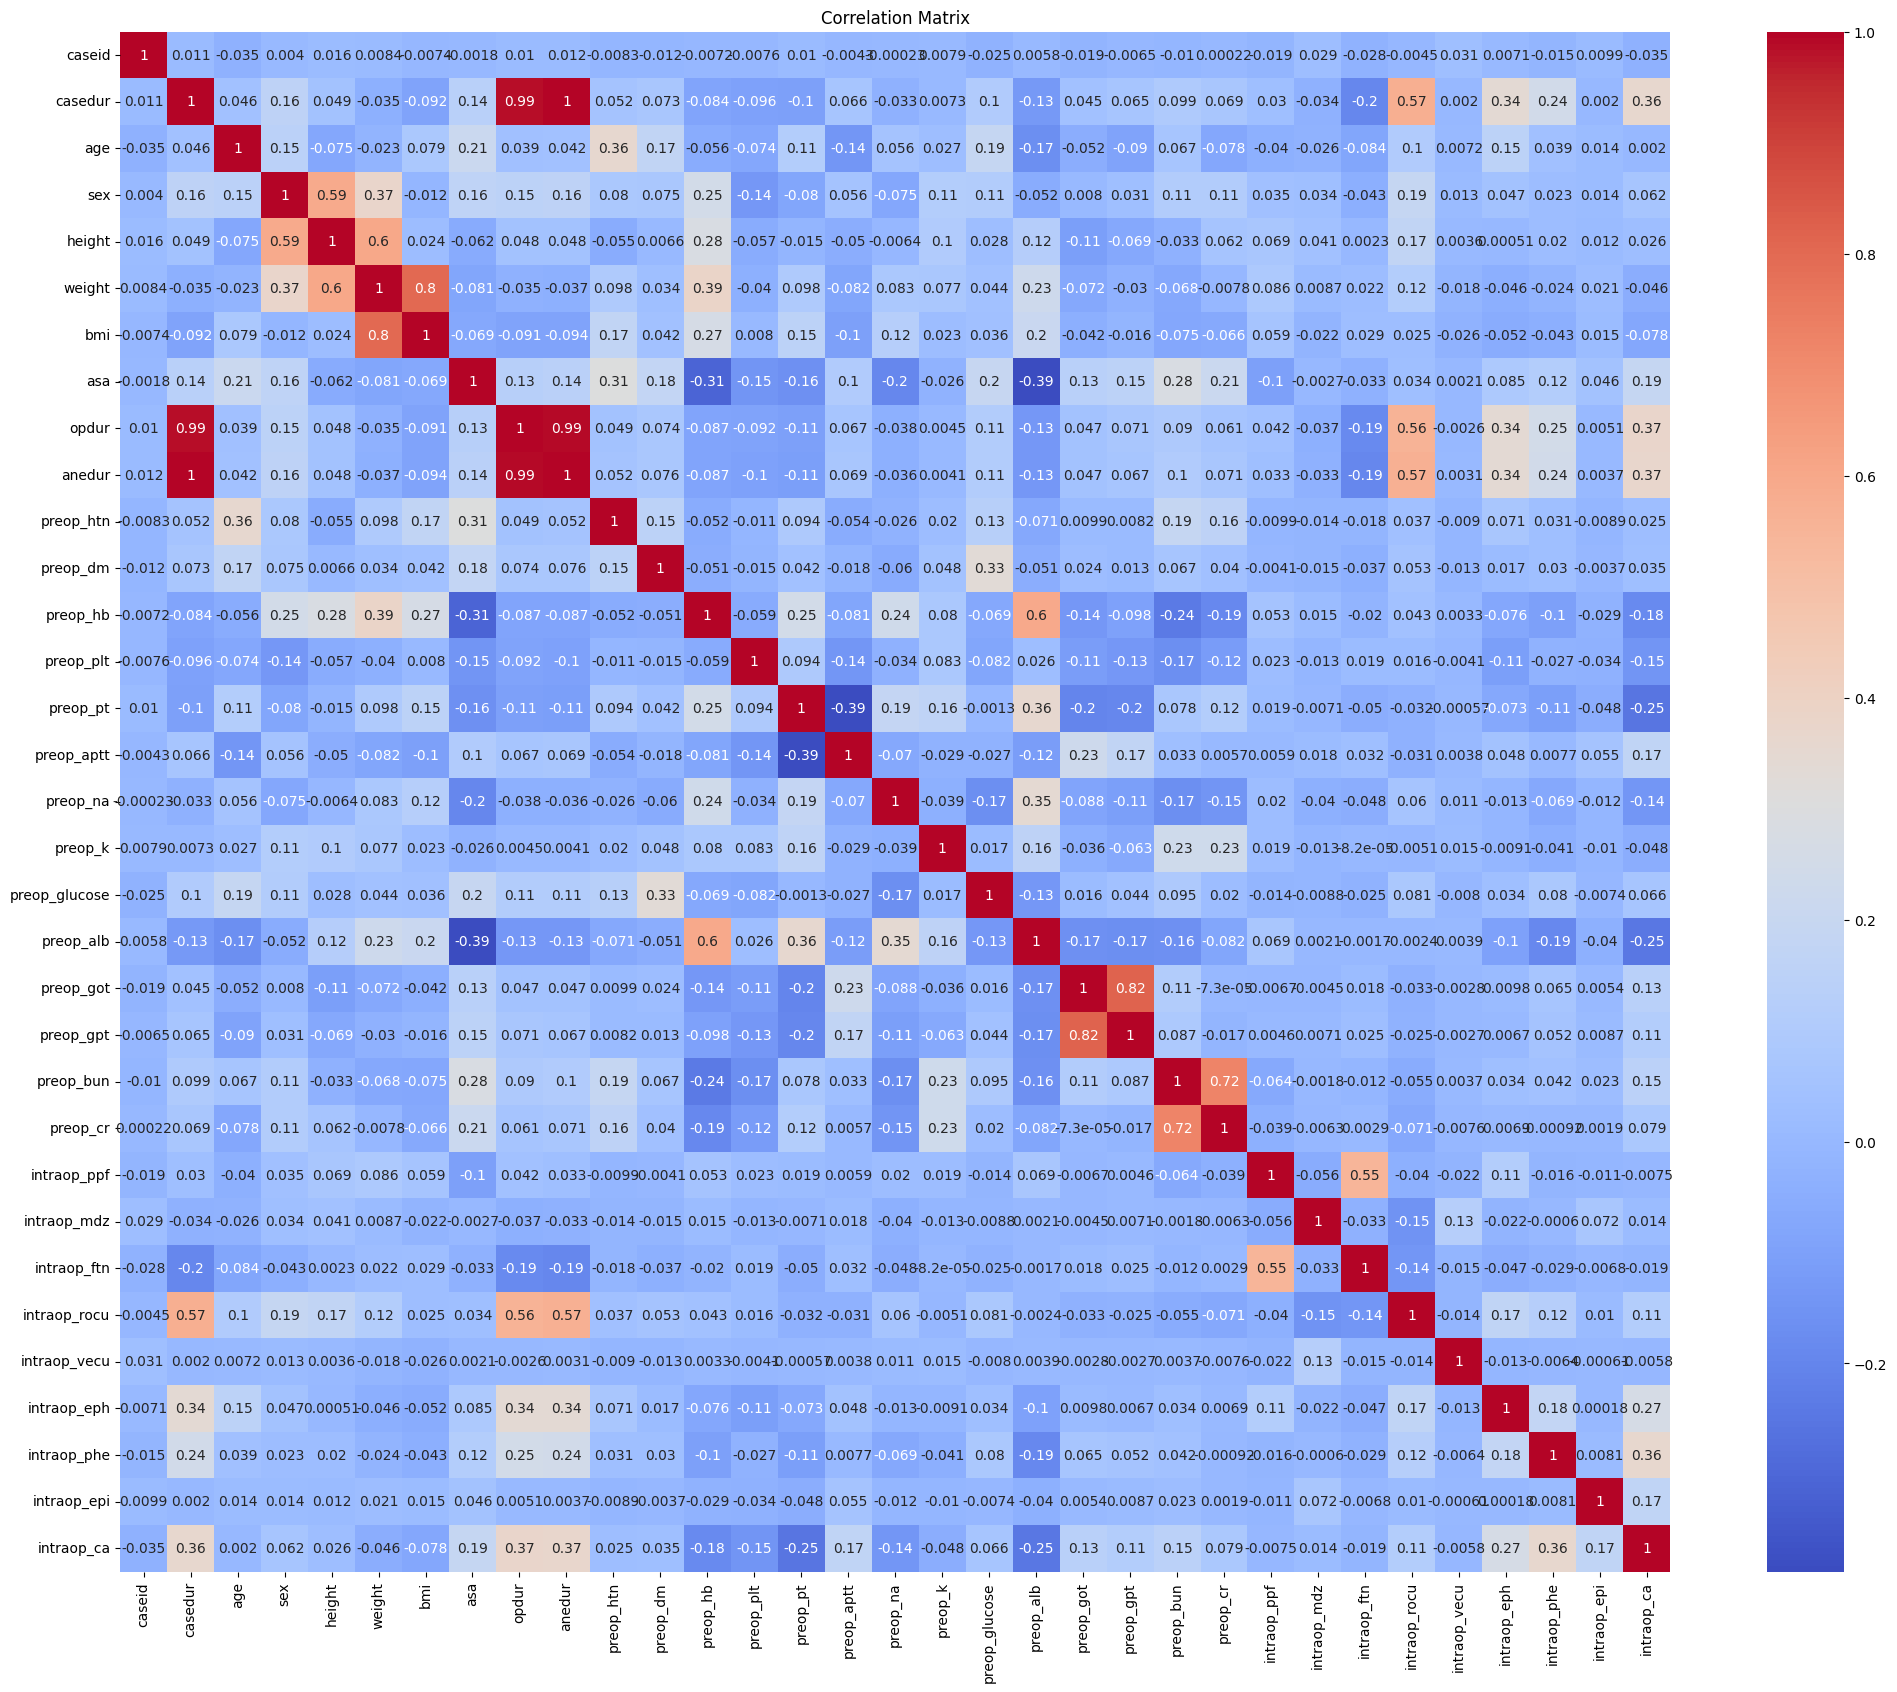

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##### Feature Importance Graph

[('intraop_ftn', np.float64(0.841334713638749)), ('intraop_eph', np.float64(0.21446210291276863)), ('intraop_rocu', np.float64(0.20334433329618182)), ('anedur', np.float64(0.185546474123933)), ('opdur', np.float64(0.16728196776557788)), ('casedur', np.float64(0.0913707852720533)), ('weight', np.float64(0.08069065257741556)), ('height', np.float64(0.07484769077941929)), ('preop_glucose', np.float64(0.0602966543930594)), ('preop_hb', np.float64(0.057823231608618485))]


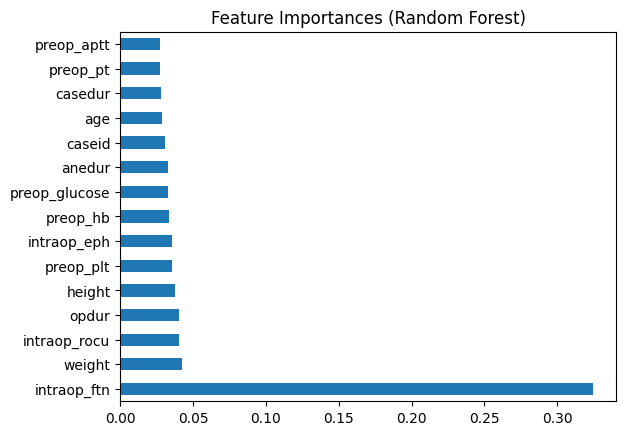

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

df_clean = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")

X = df_clean.drop(columns=['intraop_ppf'])
y = df_clean['intraop_ppf']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Check feature importance
importance = permutation_importance(model, X, y)
sorted_importance = sorted(zip(X.columns, importance.importances_mean), key=lambda x: x[1], reverse=True)
print(sorted_importance[:10])

import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances (Random Forest)')
plt.show()


##### L1 (Lasso) Feature Selection

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np

df = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")

# Features and target
X = df.drop(columns='intraop_ppf')
y = df['intraop_ppf']

# Encode categorical features if needed
for col in X.select_dtypes(exclude=['number']).columns:
    X[col] = X[col].astype('category').cat.codes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# alpha = regularization strength (tune for your data)
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y)

# Show coefficients
coef = pd.Series(lasso.coef_, index=X.columns)
print("Lasso coefficients:\n", coef)

# Select features with non-zero coefficients
selected_features = coef[coef != 0].index.tolist()
print("Selected features:", selected_features)



Lasso coefficients:
 casedur          -3.983030
age               0.153430
sex               2.905472
height            2.582933
weight           -0.000000
bmi               2.277847
asa              -4.288003
opdur            11.195838
anedur            4.176613
preop_htn         0.489299
preop_dm          0.931252
preop_hb         -1.254315
preop_plt         1.313875
preop_pt          2.253311
preop_aptt        0.466174
preop_na          0.785383
preop_k           0.196406
preop_glucose    -0.031100
preop_alb         2.240743
preop_got         0.119412
preop_gpt         0.537095
preop_bun        -2.378659
preop_cr         -1.113201
intraop_mdz      -2.415406
intraop_ftn      31.197638
intraop_rocu     -6.167497
intraop_vecu     -0.393093
intraop_eph       6.225228
intraop_phe      -1.108186
intraop_epi       0.553830
intraop_ca       -2.494351
dtype: float64
Selected features: ['casedur', 'age', 'sex', 'height', 'bmi', 'asa', 'opdur', 'anedur', 'preop_htn', 'preop_dm', 'preop_hb', 'p

### **Model Selection** 

#### Linear Regression Model

Trained a Linear Regression Model using features from all features selected by L1 feature selection. 

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")

features = ['casedur', 'age', 'sex', 'height', 'bmi', 'asa', 'opdur', 'anedur', 'preop_htn', 'preop_dm', 'preop_hb', 'preop_plt', 'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_glucose', 'preop_alb', 'preop_got', 'preop_gpt', 
             'preop_bun', 'preop_cr', 'intraop_mdz', 'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intraop_epi', 'intraop_ca']
target = 'intraop_ppf'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

Mean Squared Error: 1862.86
R² Score: 0.34
          Feature  Coefficient
2             sex     5.831912
17      preop_alb     4.758370
9        preop_dm     4.054416
8       preop_htn     2.168793
23    intraop_ftn     0.805931
15        preop_k     0.724947
4             bmi     0.723930
26    intraop_eph     0.477984
14       preop_na     0.374870
3          height     0.292822
12       preop_pt     0.191581
13     preop_aptt     0.148490
6           opdur     0.107644
7          anedur     0.030356
11      preop_plt     0.018560
19      preop_gpt     0.009513
16  preop_glucose     0.002871
28    intraop_epi     0.001325
18      preop_got     0.000892
29     intraop_ca    -0.005364
27    intraop_phe    -0.005968
0         casedur    -0.020246
1             age    -0.026032
24   intraop_rocu    -0.185070
20      preop_bun    -0.269065
21       preop_cr    -0.509847
10       preop_hb    -0.876529
25   intraop_vecu    -0.956187
22    intraop_mdz    -6.584806
5             asa    -7.128

#### Linear Regression Model #2 (Best)
Trained a Linear Regression Model using top 5 features selected by L1 feature selection and attained the same R2 Score as when I used all the features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")

features = ['intraop_ftn', 'intraop_eph', 'anedur', 'sex', 'height']
target = 'intraop_ppf'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

#import joblib

# Save the model
#joblib.dump(model, r"C:\Users\tyski\School\AI Project\SavedModels\propofol_model.pkl")

#print("Model saved successfully!")


Mean Squared Error: 1887.05
R² Score: 0.34
       Feature  Coefficient
0  intraop_ftn     0.808226
1  intraop_eph     0.421535
4       height     0.355983
2       anedur     0.055226
3          sex    -0.147013
Model saved successfully!


#### Linear Regression Model 3

Trained another Linear Regression Model using only intraoperative data, R2 Score was 4% lower than using both intra and preoperative data. When training a Linear Regression model with only pre-operative data it showed very weak predictive power with a R2 score <3%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")

features = ['casedur', 'opdur', 'anedur', 'intraop_ftn', 'intraop_mdz', 'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intraop_epi', 'intraop_ca']
target = 'intraop_ppf'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

Mean Squared Error: 1979.93
R² Score: 0.30
       Feature  Coefficient
0  intraop_ftn      0.77215


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\tyski\School\AI Project\Sample Data\400DataRuns\ClinInfo_StrictNorm.csv")

features = ['age', 'sex', 'height', 'bmi', 'asa', 'preop_htn', 'preop_dm', 'preop_plt', 'preop_pt', 
            'preop_aptt', 'preop_na', 'preop_k', 'preop_glucose', 'preop_alb', 'preop_got', 'preop_gpt', 'preop_bun', 'preop_cr']
target = 'intraop_ppf'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

Mean Squared Error: 2888.17
R² Score: -0.02
          Feature  Coefficient
5       preop_htn     4.809886
1             sex     3.713497
6        preop_dm     3.589214
11        preop_k     1.556753
3             bmi     0.781436
13      preop_alb     0.590384
17       preop_cr     0.333693
2          height     0.268261
9      preop_aptt     0.208515
8        preop_pt     0.066094
15      preop_gpt     0.028008
7       preop_plt     0.012373
12  preop_glucose    -0.000186
14      preop_got    -0.011881
10       preop_na    -0.065475
0             age    -0.166917
16      preop_bun    -0.278685
4             asa    -8.770700


#### Classification Model
A classification model was created to evaluate whether reframing the prediction task as a high-vs-low dosing problem would result in better model performance. This approach was successful, with the classification model achieving an R^2^ of 81%, outperforming the earlier regression attempts. 

For this model, propofol bolus doses were categorized as "high" or "low". Doses greater than 100mg were labeled as "high", and doses under that were labeled "low". The 100mg cutoff was chosen based on typical clinical dosing ranges: anesthesiologists generally administer propofol bolus doses between 1.5 mg/kg and 2.5 mg/kg, and with an average adult weight of ~62kg, doses above 100 mg fall within the higher end of the standard dosign range. This made 100 mg a clinically reasonable and data driven threshold for classification.  


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Load and clean data ---
df = pd.read_csv("C:\\Users\\tyski\\School\\AI Project\\Sample Data\\400DataRuns\\ClinInfo_NormCleaned.csv")

# Convert everything to numeric, coercing non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# --- Define features and target ---
# Create binary classification target based on intraop_ppf
df["dose_class"] = (df["intraop_ppf"] >= 100).astype(int)

# Define feature columns
features = [
    "weight", "bmi", "height", "sex", "age",
    "preop_cr", "preop_alb", "asa",
    "preop_htn", "preop_dm", "preop_glucose", "intraop_ftn"
]

X = df[features]
y = df["dose_class"]

# --- Normalize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Train classification model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --- Evaluate ---
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Optional: Top 5 highest probability predictions ---
probs = model.predict_proba(X_test)[:, 1]  # probability of "high dose"
top5_idx = probs.argsort()[-5:][::-1]
print("\nTop 5 most confident 'high dose' predictions:")
print(df.iloc[y_test.index[top5_idx]][["intraop_ppf"] + features])


Accuracy: 0.8142259414225942

Confusion Matrix:
 [[822  38]
 [184 151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       860
           1       0.80      0.45      0.58       335

    accuracy                           0.81      1195
   macro avg       0.81      0.70      0.73      1195
weighted avg       0.81      0.81      0.80      1195


Top 5 most confident 'high dose' predictions:
      intraop_ppf  weight   bmi  height  sex   age  preop_cr  preop_alb  asa  \
471         120.0    60.5  21.4   168.1  1.0  19.0      0.83        3.9  1.0   
2157        100.0    64.8  25.1   160.7  0.0  46.0      0.51        4.0  1.0   
5753        150.0    78.0  23.5   182.2  1.0  46.0      0.88        4.6  3.0   
5468        100.0    64.8  24.0   164.3  1.0  62.0      0.94        4.4  3.0   
4310        120.0    64.1  20.7   176.0  1.0  18.0      0.92        4.7  1.0   

      preop_htn  preop_dm  preop_glucose  intrao

### **Inference**

#### Inference Code: 

In [5]:
import pandas as pd
import joblib

# Load model
model = joblib.load(r"C:\Users\tyski\School\AI Project\SavedModels\propofol_model.pkl")

# New case to predict
new_patient = pd.DataFrame([{
    "intraop_ftn": 0.3,
    "intraop_eph": 5,
    "anedur": 120,
    "sex": 1,
    "height": 170
}])

# Run inference
prediction = model.predict(new_patient)

print("Predicted propofol infusion rate:", prediction[0])


Predicted propofol infusion rate: 24.084135166577845


### **Conclusion**

In this project, I developed a machine learning workflow to predict propofol bolus doses based on pre-operative patient data. While the models did not achieve strong regression performance, this notebook demonstrates the full process of data cleaning, feature engineering, model development, evaluation, and inference.

A classification model was also created to provide a rough baseline for anesthesiologists by predicting whether a patient would require a “high” dose (over 100 mg) or a “low” dose (under 100 mg). This model performed substantially better than the regression models, achieving ~81% accuracy, though it was limited to only two classes.

The poor regression results, reflected by low R^2^ scores, highlight the weak correlation between most pre-operative variables and the actual propofol bolus dose. Data limitations also played a role, as open-source medical datasets containing propofol dosing information are extremely rare. Additionally, the dataset included only the initial bolus dose administered to induce unconsciousness, meaning the model cannot predict dose adjustments during surgery.

Future improvements would include obtaining richer, more detailed pre-operative features and incorporating temporal vital-sign data from operating-room monitors, enabling a model that predicts dosage needs throughout surgery. However, HIPAA restrictions and limited access to clinical datasets make this challenging.

Overall, the strongest predictor identified was fentanyl dosage, which showed the highest positive correlation with propofol bolus dose and emerged as the most influential feature in the models.
